<a href="https://colab.research.google.com/github/natalyq1/Machine_learning1/blob/master/Optimizando_modelo_X_hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de predicción
Para predecir cuando un carro sera vendido o no

In [3]:
import pandas as pd
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning/datos_carros.csv')
datos.head()

,precio,vendido,edad_del_modelo,Km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [4]:
#datos ordenados pero de la peor manera
datos_ord = datos.sort_values('vendido', ascending=True)# primero los no vendidos
x_ord = datos_ord[['precio', 'edad_del_modelo', 'Km_por_ano']]
y_ord = datos_ord['vendido']
datos_ord.head()

,precio,vendido,edad_del_modelo,Km_por_ano
4999,74023.29,0,17,24812.80412
5322,84843.49,0,18,23095.63834
5319,83100.27,0,24,36240.72746
5316,87932.13,0,21,32249.56426
5315,77937.01,0,20,28414.50704


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier # modelo por defecto, una base, es muy estadistico
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score = False)
media= results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con dummy stratified, 10 = [58.00, 58.00]


In [6]:
from sklearn.tree import DecisionTreeClassifier
#en el arbol de desiciones podemos estudiar mejor las variables
SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2) # 2 posibles tomas de desicion
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con cross validation, 10 = [73.83, 77.73]


In [7]:
#generando datos aleatorios del modelo de carro
np.random.seed(SEED)
datos['modelo'] = datos.edad_del_modelo + np.random.randint(-2, 3, size=10000)
datos.modelo = datos.modelo + abs(datos.modelo.min()) + 1
datos.head()

,precio,vendido,edad_del_modelo,Km_por_ano,modelo
0,30941.02,1,23,35085.22134,26
1,40557.96,1,25,12622.05362,32
2,89627.50,0,17,11440.79806,22
3,95276.14,0,8,43167.32682,14
4,117384.68,1,9,12770.11290,13


In [8]:
#funcion
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desviacion = results['test_score'].std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [9]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos
#validacion cruzada

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


In [10]:
# GroupKFold en un pipeline con StandardScaler y SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacion',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 76.68
Intervalo [74.28, 79.08]


In [11]:
modelo

SVC()

In [12]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)#con este entreno mi modelo
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=['no','si'],
                feature_names = features)

graph = graphviz.Source(dot_data)
graph

AttributeError: ignored

# Entrenando otro modelo con mas precision- a 3 pasos/desiciones

In [13]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos
#validacion cruzada

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)
#mejora la precision con 3 pasos de profundidad

Accuracy media 78.67
Intervalo [76.40, 80.94]


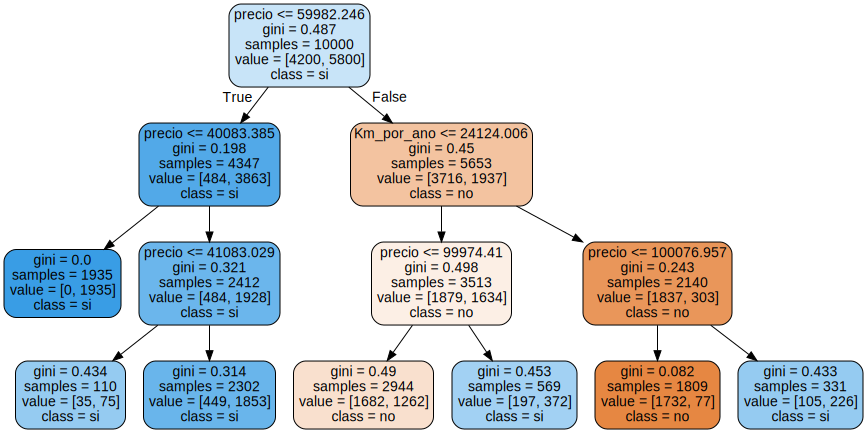

In [14]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)#con este entreno mi modelo
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file = None, filled= True, rounded = True,
                class_names=['no', 'si'],
                feature_names = features)
graph = graphviz.Source(dot_data)
graph

Este es nuestro árbol de decisión, las hojas son los nodos finales de nuestro árbol de decisión. Estos primeros nodos aquí representan las reglas, las condiciones que tienen que ser evaluadas para que al final el resultante sea estas hojas que son las cajitas finales aquí.

 Ahora, si ustedes pueden ver aquí cada una de estas hojas tiene una cantidad de samples, es decir una cantidad de registros que fueron evaluados, en este caso fue 110, en esta otra fueron 2302, ¿ahora qué sucedería si los samples aquí en estos nodos finales o en estas hojas fuera una unidad, un único registro?

Sería muy específico, muy pero muy específico, nuestro árbol de decisión. Tendría que suceder exactamente esa única ocurrencia para que el árbol pueda tomar una decisión y con esto estaríamos dificultando que puede adaptarse a más registros, a más ocurrencias, que estaría dificultando el aprendizaje.

#### Hasta un paso 3 esta bien optimizado en un paso 10 ya pierde calidad y no es optimo como a continuacion:

In [15]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos
#validacion cruzada

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 77.19
Intervalo [75.26, 79.13]


# Hiperparámetros ---> Antes del entrenamiento

# Parámetro ---> Valores resultantes del modelo/entrenamiento

In [16]:
#PARAMETROS

def iniciar_arbol_de_desicion(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
  imprime_resultados(results)

iniciar_arbol_de_desicion(3)

Accuracy media 78.67
Intervalo [76.40, 80.94]


In [17]:
# dentro de un for

def iniciar_arbol_de_desicion(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
  test_score = results['test_score'].mean()*100
  print('Arbol max_depth = %d, testing = %.2f' % (max_depth, test_score))

for i in range(1,33):
  iniciar_arbol_de_desicion(i)

Arbol max_depth = 1, testing = 75.78
Arbol max_depth = 2, testing = 75.78
Arbol max_depth = 3, testing = 78.67
Arbol max_depth = 4, testing = 78.63
Arbol max_depth = 5, testing = 78.56
Arbol max_depth = 6, testing = 78.12
Arbol max_depth = 7, testing = 77.96
Arbol max_depth = 8, testing = 77.86
Arbol max_depth = 9, testing = 77.38
Arbol max_depth = 10, testing = 77.19
Arbol max_depth = 11, testing = 76.97
Arbol max_depth = 12, testing = 76.49
Arbol max_depth = 13, testing = 75.81
Arbol max_depth = 14, testing = 75.66
Arbol max_depth = 15, testing = 75.16
Arbol max_depth = 16, testing = 75.11
Arbol max_depth = 17, testing = 74.74
Arbol max_depth = 18, testing = 74.33
Arbol max_depth = 19, testing = 74.34
Arbol max_depth = 20, testing = 74.22
Arbol max_depth = 21, testing = 73.80
Arbol max_depth = 22, testing = 73.81
Arbol max_depth = 23, testing = 73.38
Arbol max_depth = 24, testing = 73.43
Arbol max_depth = 25, testing = 73.14
Arbol max_depth = 26, testing = 73.04
Arbol max_depth = 27,

Overfiting --->
Ejemplo, podemos ver un examen. Nosotros nos aprendemos los tres primeros capítulos de un libro y en el examen viene el quinto capítulo. No estamos preparados. Entonces esto es lo que puede estar pasando aquí. Nuestros datos han entrenado tan bien que se han aprendido el entrenamiento, pero no están preparados para el mundo real, para los datos reales, para el escenario real.

In [18]:
# contener datos en una lista

def iniciar_arbol_de_desicion(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord,
              cv = cv, groups = datos.modelo,
                return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print('Arbol max_depth = %d, training = %.2f, testing = %.2f' % (max_depth, train_score, test_score))
  tabla = [max_depth, train_score, test_score]
  return tabla

resultados= [iniciar_arbol_de_desicion(i) for i in range(1,33)]
resultados

Arbol max_depth = 1, training = 75.79, testing = 75.78
Arbol max_depth = 2, training = 75.79, testing = 75.78
Arbol max_depth = 3, training = 78.75, testing = 78.67
Arbol max_depth = 4, training = 78.79, testing = 78.63
Arbol max_depth = 5, training = 78.94, testing = 78.56
Arbol max_depth = 6, training = 79.17, testing = 78.12
Arbol max_depth = 7, training = 79.50, testing = 77.96
Arbol max_depth = 8, training = 79.89, testing = 77.86
Arbol max_depth = 9, training = 80.46, testing = 77.38
Arbol max_depth = 10, training = 81.16, testing = 77.19
Arbol max_depth = 11, training = 82.03, testing = 76.97
Arbol max_depth = 12, training = 82.89, testing = 76.49
Arbol max_depth = 13, training = 83.95, testing = 75.81
Arbol max_depth = 14, training = 85.03, testing = 75.66
Arbol max_depth = 15, training = 86.14, testing = 75.16
Arbol max_depth = 16, training = 87.19, testing = 75.11
Arbol max_depth = 17, training = 88.31, testing = 74.74
Arbol max_depth = 18, training = 89.26, testing = 74.33
A

[[1, 75.79116856866345, 75.78421883757397],
 [2, 75.79116856866345, 75.78421883757397],
 [3, 78.75099279906651, 78.67263337284332],
 [4, 78.78762769262194, 78.63280264599946],
 [5, 78.9410073693779, 78.55591244881775],
 [6, 79.17011453793069, 78.12326641953089],
 [7, 79.49680619886925, 77.96318477047309],
 [8, 79.8878103533372, 77.85795103730995],
 [9, 80.45900912486006, 77.3769561546462],
 [10, 81.15899430522666, 77.19420355606299],
 [11, 82.0324897748914, 76.97155235848373],
 [12, 82.89479711407509, 76.49439895201009],
 [13, 83.94708663888434, 75.80733123067736],
 [14, 85.0296638417324, 75.66048240262317],
 [15, 86.14300852294707, 75.15633049496758],
 [16, 87.19199906684938, 75.10782992856304],
 [17, 88.30979402742274, 74.73565827883768],
 [18, 89.25870628782606, 74.33375452328517],
 [19, 90.32425183685724, 74.33789590095503],
 [20, 91.32108470047993, 74.223477897303],
 [21, 92.13877325024768, 73.80182272660134],
 [22, 93.01867719757558, 73.81181823864084],
 [23, 93.7956313685999, 73

In [19]:
# contener datos en un DataFrame

def iniciar_arbol_de_desicion(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord,
              cv = cv, groups = datos.modelo,
                return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print('Arbol max_depth = %d, training = %.2f, testing = %.2f' % (max_depth, train_score, test_score))
  tabla = [max_depth, train_score, test_score]
  return tabla

resultados= [iniciar_arbol_de_desicion(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns = ['max_depth', 'train', 'test'])
resultados.head()

Arbol max_depth = 1, training = 75.79, testing = 75.78
Arbol max_depth = 2, training = 75.79, testing = 75.78
Arbol max_depth = 3, training = 78.75, testing = 78.67
Arbol max_depth = 4, training = 78.79, testing = 78.63
Arbol max_depth = 5, training = 78.94, testing = 78.56
Arbol max_depth = 6, training = 79.17, testing = 78.12
Arbol max_depth = 7, training = 79.50, testing = 77.96
Arbol max_depth = 8, training = 79.89, testing = 77.86
Arbol max_depth = 9, training = 80.46, testing = 77.38
Arbol max_depth = 10, training = 81.16, testing = 77.19
Arbol max_depth = 11, training = 82.03, testing = 76.97
Arbol max_depth = 12, training = 82.89, testing = 76.49
Arbol max_depth = 13, training = 83.95, testing = 75.81
Arbol max_depth = 14, training = 85.03, testing = 75.66
Arbol max_depth = 15, training = 86.14, testing = 75.16
Arbol max_depth = 16, training = 87.19, testing = 75.11
Arbol max_depth = 17, training = 88.31, testing = 74.74
Arbol max_depth = 18, training = 89.26, testing = 74.33
A

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


<Axes: xlabel='max_depth', ylabel='train'>

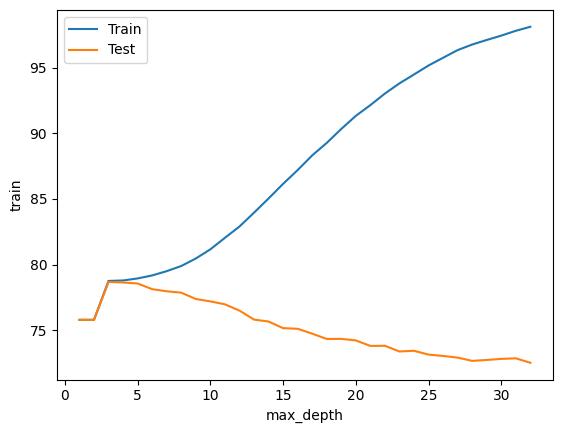

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x= 'max_depth', y = 'train', data= resultados,label='Train')
sns.lineplot(x='max_depth', y ='test', data=resultados, label='Test')

In [21]:
resultados.sort_values('test', ascending= False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


## Conclusion:

El modelo en entrenamiento tiene unos porcentajes de presicion mayores pero no en el modelo de testing, en este modelo en el paso 3 es el que mas precision lleva.


# Espacio de parámetros de dos dimensiones

Un espacio de parámetros son los distintos valores que puede asumir un parámetro o un hiper parámetro de nuestro modelo. ¿Recuerdan lo que era un hiper parámetro?

Habíamos trabajado con el max_depth para nuestro árbol de decisión. Ese es un hiper parámetro, el espacio de parámetros serían los distintos valores que podría asumir max_depth.

In [22]:
def iniciar_arbol_de_desicion(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth= max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_ord, y_ord,
              cv = cv, groups = datos.modelo,
                return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print('Arbol max_depth = %d, min_samples_leaf = %d,training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, train_score, test_score]
  return tabla

def buscar():
  resultados = []
  for max_depth in range (1, 32):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabla = iniciar_arbol_de_desicion(max_depth, min_samples_leaf)
      resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'train', 'test'])
  return resultados

resultados = buscar()
resultados.head()


Arbol max_depth = 1, min_samples_leaf = 32,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256,training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 32,training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 64,training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128,training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256,training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 32,training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 64,training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 128,training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256,training = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 32,training = 78.75, testing =

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [23]:
resultados.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,train,test
11,3,256,78.750993,78.672633
8,3,32,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633


Como ustedes pueden ver aquí, nos está mostrando la mejor combinación, la verdad estas 5 tuvieron el mismo performance para las combinaciones, nos está trayendo el valor igual y las combinaciones simplemente el max_depth era de profundidad 3 y el min_samples_leaf de 256 a 32.

Esta primera ya nos servía como resultado final para optimizar nuestro modelo.

# Matriz de correlación y explorando más espacios de parámetros

In [24]:
corr = resultados.corr()
corr
#ya esta por default en pandas

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.819789e-16,0.546146,-0.024381
min_samples_leaf,-2.819789e-16,1.000000e+00,-0.401773,0.341805
train,5.461464e-01,-4.017734e-01,1.000000,0.133720
test,-2.438091e-02,3.418055e-01,0.133720,1.000000


<Axes: >

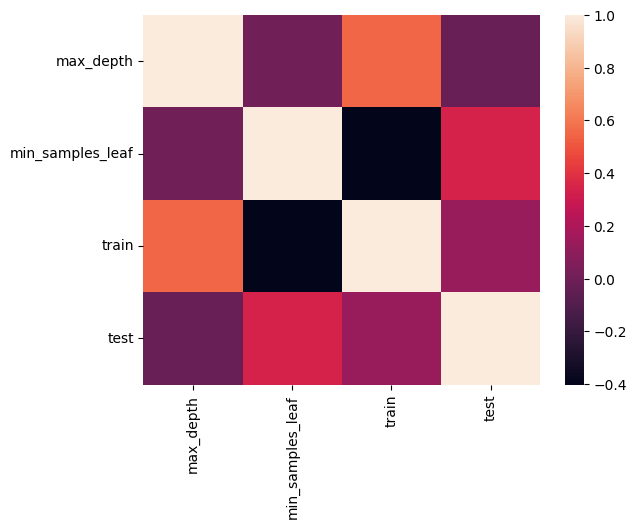

In [25]:
sns.heatmap(corr)

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='train', ylabel='min_samples_leaf'>,
        <Axes: xlabel='test', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='min_samples_leaf', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='min_samples_leaf', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>]], dtype=object)

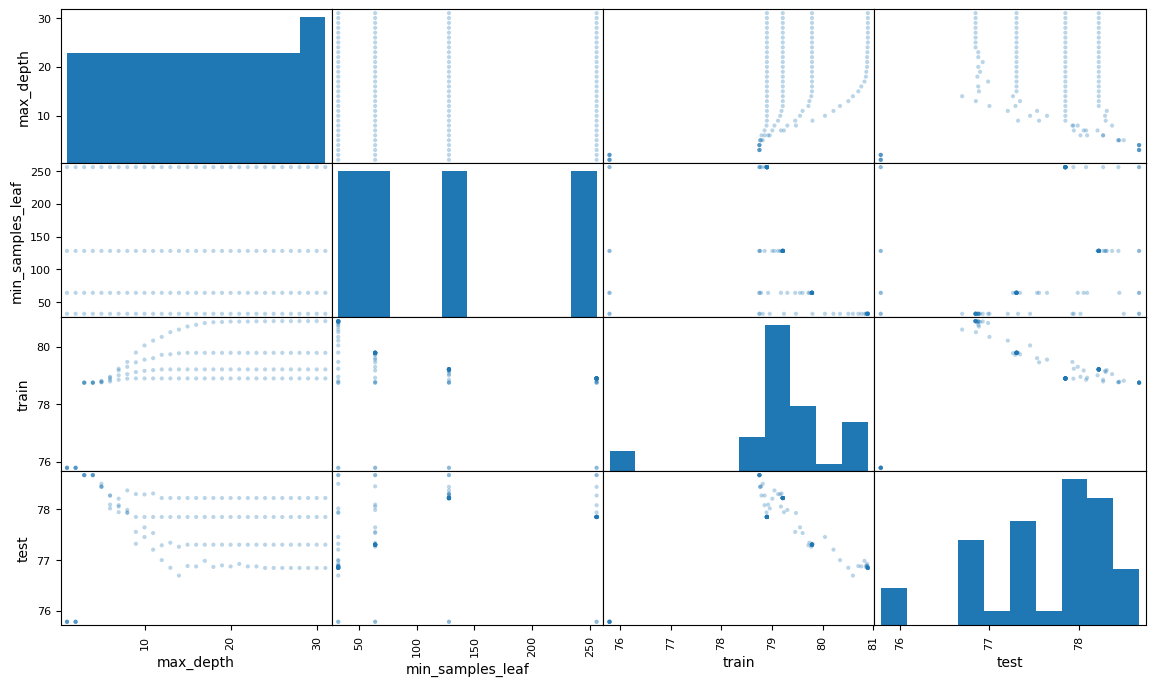

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

Aquí esta es una matriz de correlación también en formato gráfico, en las diagonales nosotros vamos a tener un histograma, es decir, a ver, vamos aquí al eje X aquí. Esto quiere decir el histograma que min_samples_leaf ha tenido, estos valores en estos tamaños. Recuerdan los cuatro valores que colocamos en min_samples_leaf, estos son los valores en la misma proporción.

Aquí, por ejemplo, los datos de entrenamiento que tuvieron los resultados entre 79 y la mayor cantidad de resultados entre 79, es decir, los datos entrenamiento fueron entre 79 y 80 tal vez. No. Llegaron hasta 79 como máximo. Es la cantidad de veces que aparece este valor en mis datos de entrenamiento.

Y aquí también mis datos de test, o mis datos de prueba, la cantidad, la mayor cantidad de veces que apareció, el valor del performance o de precisión, fue también de 78. Entonces esto es lo que vemos en la diagonal y lo que no es diagonal, es ya la correlación por ejemplo, aquí podemos ver que este es el max_depth, este cuadrito aquí, por ejemplo.

Cuanto mayor el max_depth, ustedes pueden ver aquí que va aumentando el valor cuanto mayor el max_depth, miren lo que pasa con el test, los datos de prueba. Van disminuyendo. Es decir, es una correlación negativa.

Cuanto mayor el max_depth, más a la derecha, los datos de prueba van disminuyendo, o sea la precisión cae. Y pasa lo contrario con el entrenamiento. Es decir, cuanto mayor el max_depth, aquí, cuanto mayor es max_depth, miren lo que pasa con entrenamiento. Va subiendo. Pasa de 10.78 para 80 y un poco más.

Es decir, que los datos se acostumbraron mejor al entrenamiento con el max_depth, tiene una correlación positiva. Ahora observen el min_samples_leaf. Cuanto mayor el min_samples_leaf, ¿qué es lo que pasa con los datos de test o los datos de prueba? Cuanto mayor el valor, los datos de prueba es se concentran mejor entre 78, es decir, obtiene una mejor precisión cuando mayor el valor de min_samples_leaf.

Aquí ya tengo una relación o una correlación positiva y sucede lo contrario con los datos de entrenamiento. Entonces, con esta matriz aquí yo ya puedo ver lo siguiente, puedo ver que debería escoger los valores mayores en el min_samples_leaf y los valores menores en el max_depth. Entonces ya sé por dónde debo concentrar mis esfuerzos.

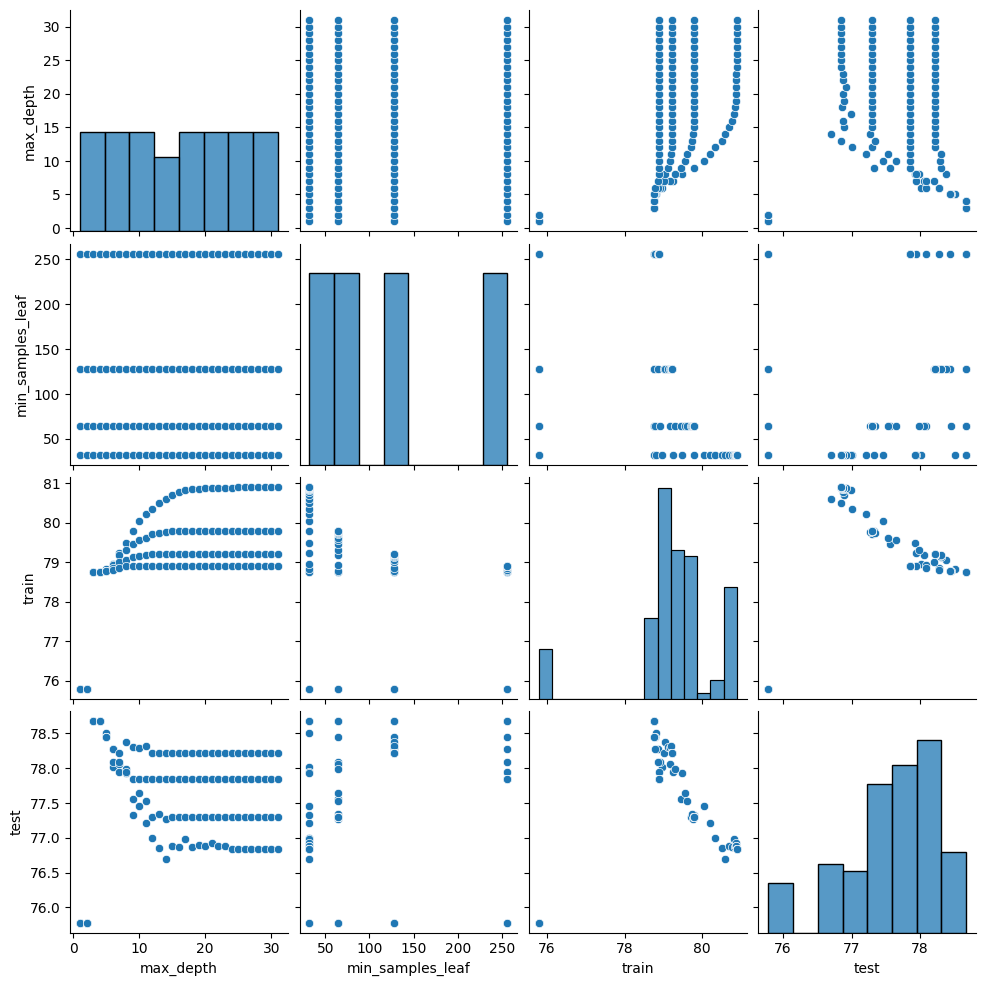

In [27]:
sns.pairplot(resultados)

Aquí podemos ver la misma relación, los histogramas en la diagonal y lo que no es diagonal, la relación, como pueden ver aquí, cuanto mayor el max_depth o cuanto menor el max_depth, mejor es el test o la prueba o la performance de mis datos de prueba.

Y cuanto mayor el min_samples_leaf, mejor resultado voy a tener también en mis datos de prueba. Entonces esta sería la combinación perfecta que yo tengo que buscar dentro de mi espacio de parámetros.

<Axes: >

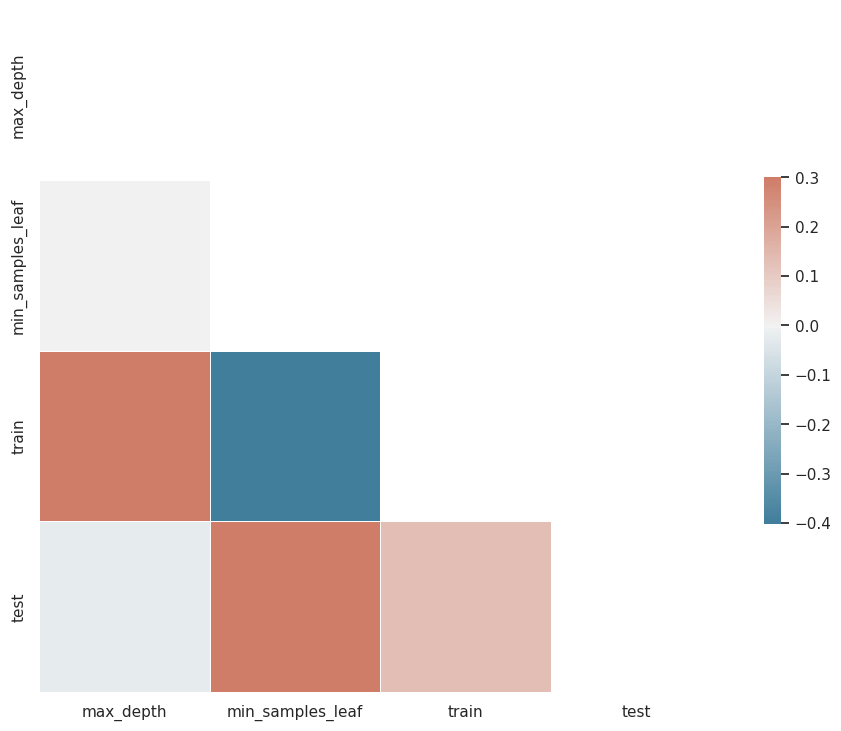

In [28]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

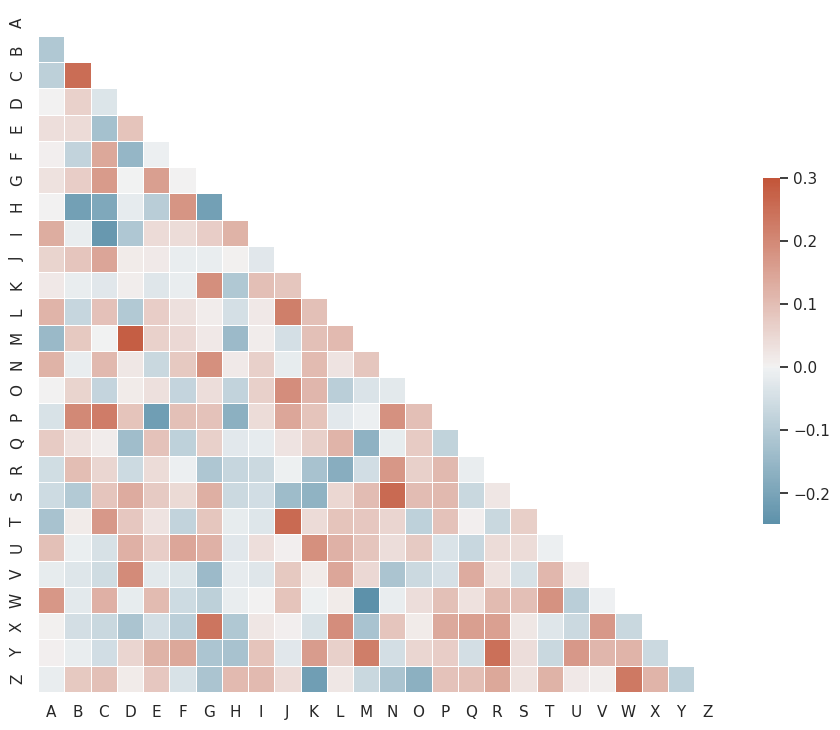

In [29]:
# seaborn correlation
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
def buscar():
  resultados = []
  for max_depth in range (1, 10):
    for min_samples_leaf in [128, 190, 220, 256]:
      tabla = iniciar_arbol_de_desicion(max_depth, min_samples_leaf)
      resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'train', 'test'])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 128,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 190,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 220,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256,training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128,training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 190,training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 220,training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256,training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 128,training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 190,training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 220,training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256,training = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 128,training = 78.75, te

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,190,75.791169,75.784219
2,1,220,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,128,75.791169,75.784219


In [31]:
resultados.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,train,test
13,4,190,78.750993,78.672633
11,3,256,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,220,78.750993,78.672633
12,4,128,78.750993,78.672633


El max_depth, un valor bajo realmente y el min_samples_leaf, un valor alto entre ese intervalo que nos había indicado en esta matriz de correlación. Y fue esa la combinación que nos trajo un mejor desempeño de nuestro modelo. Es así cómo nosotros realmente tenemos que buscar dentro de todo el espacio de parámetros de nuestros hiper parámetros, para poder optimizar nuestro modelo.

# Explorando 3 ó más hiper parámetros

In [32]:
def iniciar_arbol_de_desicion(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth= max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_ord, y_ord,
              cv = cv, groups = datos.modelo,
                return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  print('Arbol max_depth = %d, min_samples_leaf = %d, min_samples_split =%d,training = %.2f, testing = %.2f' % (max_depth, min_samples_split, min_samples_leaf, train_score, test_score))
  tabla = [max_depth,min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabla

def buscar():
  resultados = []
  for max_depth in range (1, 33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabla = iniciar_arbol_de_desicion(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'min_samples_split', 'train', 'test', 'fit_time', 'score_time'])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split =32,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split =32,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split =32,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, min_samples_split =32,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split =64,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split =64,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split =64,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, min_samples_split =64,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split =128,training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split =128,training = 75.79, testing = 

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.007746,0.002605
1,1,32,64,75.791169,75.784219,0.006415,0.002565
2,1,32,128,75.791169,75.784219,0.007265,0.002722
3,1,32,256,75.791169,75.784219,0.007842,0.002955
4,1,64,32,75.791169,75.784219,0.008561,0.002858


fit_time = tiempo de entrenamiento
score_time = tiempo de prueba

In [33]:
corr = resultados.corr()

<Axes: >

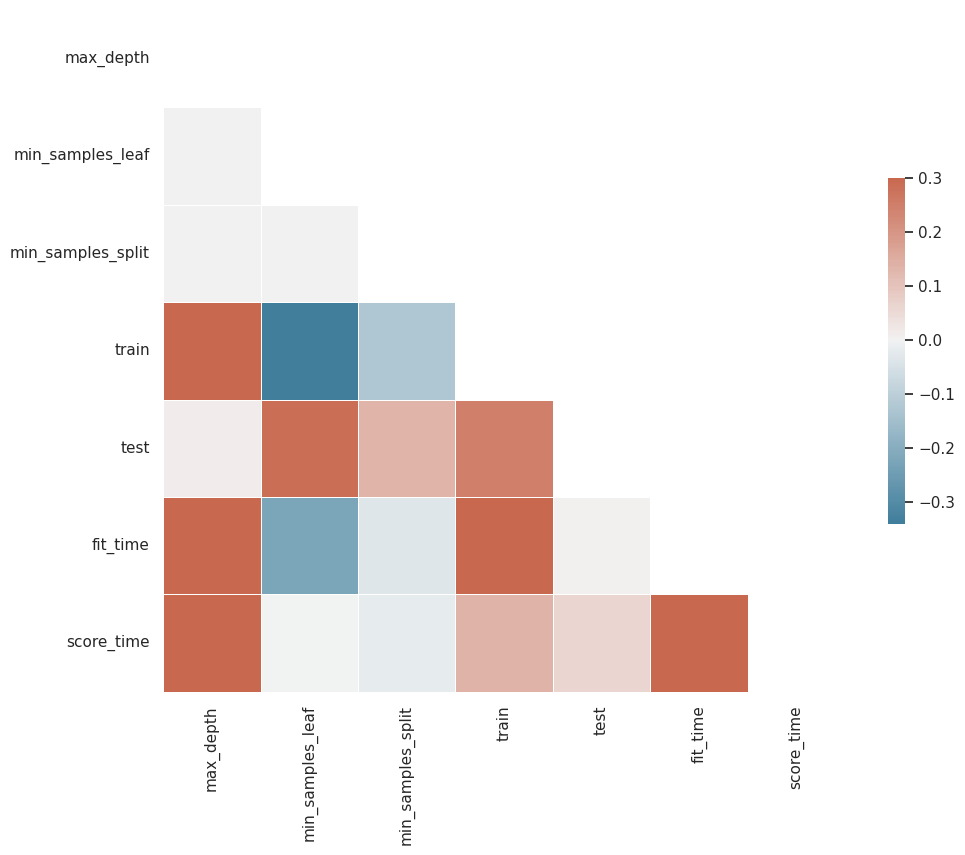

In [34]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

La escala de colores donde nos indica la relación que tiene una correlación positiva en escala de colores y una relación negativa.

Entonces, cuanto más intenso, más marrón, cuanto más intenso, también más azul. Cuando esté en el medio la correlación es débil. Entonces por ejemplo, aquí nosotros podemos ver que nuestros datos prueba tienen una correlación casi nula. Si está en blanco aquí, es 0 y es una correlación nula con el max_depth, lo que quiere decir es que no interesa mucho los valores del max_depth para llegar al mismo resultado de precisión.

El test sí tiene una correlación positiva un poco intensa porque cuanto más intenso el color, un poco más fuerte la correlación con el min_samples_leaf, una correlación positiva, una correlación poco débil con el min_samples_split, una correlación positiva, un poco débil con el min_samples_split, que es el tercer parámetro que hemos adicionado. Entonces, tal vez no tenga mucho que ver o no adicione mucho valor a nuestra optimización de nuestro modelo.

In [35]:
resultados.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.014800,0.002635
48,4,32,32,78.750993,78.672633,0.020785,0.003942
34,3,32,128,78.750993,78.672633,0.017302,0.003939
35,3,32,256,78.750993,78.672633,0.018932,0.004182
36,3,64,32,78.750993,78.672633,0.018204,0.003601


Está ordenado en formato descendiente, entonces miren, observen ustedes que estos primeros cinco valores nos arrojó la misma precisión para nuestro modelo.

La mejor, que está en la primera posición es esta combinación, el max_depth de 4 con el min_samples_leaf de 256, min_samples_split de 256. Esto porque hemos recorrido solo los valores que hemos colocado dentro de la lista.

# Utilizando GridSearchCV con hiper parámetros

Hace una búsqueda exhaustiva sobre valores de parametros especificos para un estimado.

In [36]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy'], #validacion cruzada
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = GroupKFold(n_splits = 10))
buscar.fit(x_ord, y_ord, groups = datos.modelo)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024298,0.014548,0.003688,0.000398,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.029242,0.014988,0.006534,0.005355,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.030718,0.009011,0.008778,0.005145,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.024821,0.008729,0.007861,0.004367,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.018672,0.003918,0.005127,0.002184,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


Este método GridSearchCV nos devuelve el tiempo de entrenamiento, la media del tiempo de entrenamiento, la desviación estándar, el tiempo de score, el tiempo de desviación estándar también.

Esto ya lo habíamos obtenido también de otra manera en el video anterior. Aquí ya viene automáticamente también. El parámetro, cada uno de estos registros es una combinación, el parámetro que se utilizó para esa combinación, el max_depth, el min_samples_leaf, es decir los cuatro parámetros que solicitamos una búsqueda exhaustiva.

Incluso tenemos un diccionario aquí en formato diccionario, todos los parámetros que se utilizó en esta combinación. Tenemos el score, tenemos todos los 10 splits que solicitamos para la validación cruzada y mucha más información.

### Cuales fueron los mejores parámetros del modelo, a continuación:

In [38]:
print(buscar.best_params_)
print(buscar.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [39]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [40]:
from sklearn.metrics import accuracy_score

prediccion = mejor.predict(x_ord)
accuracy = accuracy_score(prediccion, y_ord) * 100
print('Accuracy para los datos fue %.2f%%' % accuracy)

Accuracy para los datos fue 78.75%


El accuracy, para nuestros datos reales, utilizando el mejor modelo del GridSearchCV es de 78.75. Hemos llegado a una conclusión bien fácil utilizando GridSearchCV, mejor que lo que hemos aprendido con los otros métodos dentro de nuestro entrenamiento.

# Nested Cross Validation y validando el mejor modelo

No hace una particion con GrupoKFold

In [41]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy'], #validacion cruzada
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = KFold(n_splits = 5, shuffle = True))
buscar.fit(x_ord, y_ord)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017378,0.004189,0.004412,0.000165,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.016013,0.001185,0.005339,0.002184,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.020045,0.008341,0.004142,0.000152,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.019262,0.007022,0.004883,0.001879,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.017350,0.001938,0.006599,0.004871,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


### Segunda validacion cruzada

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits = 5, shuffle = True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

Acaba de seleccionar el mejor modelo que obtuvimos en la primera validación cruzada y está realizando ahora la segunda variación cruzada, es decir, coge ese modelo, lo aplica nuevamente sobre los datos y obtiene nuevos valores de predicción para saber si realmente era 0.75 o nosotros estábamos viendo algún bias.

Bias es una desviación sobre el sobre el resultado real con los datos reales. Muy bien, acabo de terminar. Entonces ustedes pueden ver que le pedimos a nuestra cross_val_score, nuestra segunda validación cruzada, 5 divisiones sobre el mejor modelo y nos está devolviendo las 5 predicciones de cada una de estas 5 divisiones.

Ustedes pueden ver un intervalo diferente al que obtuvimos en la primera validación cruzada, entonces vamos a crear nuestra función imprime_scores, que es nada más y nada menos que selecciona este array de 5 valores y crea una media de los scores y una media de la desviación estándar y ya está.

Vamos a crear nuestra función y vamos a invocarla ahora para que nos muestre el accuracy real que obtendríamos en los datos reales, utilizando nestedCrossValidation, que es la doble validación cruzada. Esto sí, mis amigos, es la performance o la precisión real sobre los datos reales.

Con esto sí habremos optimizado nuestro modelo a través de hiper parámetros.

In [43]:
def imprime_score(scores):
  media = scores.mean() * 100
  desviacion = scores.mean() * 100
  print('Accuracy media %.2f' % media)
  print('Intervalo [ %.2f, %.2f]' % (media - 2 * desviacion, media + 2 * desviacion))

In [44]:
imprime_score(scores)

Accuracy media 78.67
Intervalo [ -78.67, 236.01]


Es la performance o la precisión real sobre los datos reales.

Con esto sí habremos optimizado nuestro modelo a través de hiper parámetros. Interesante. No era solamente utilizar una validación cruzada, sino que tendríamos que utilizar una segunda. Ahora, ¿qué más podremos hacer aquí? Podemos nuevamente, ahora que ya tenemos el mejor modelo sobre el mejor modelo, es decir, el mejor del mejor, podemos también mostrarlo en pantalla.

In [45]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

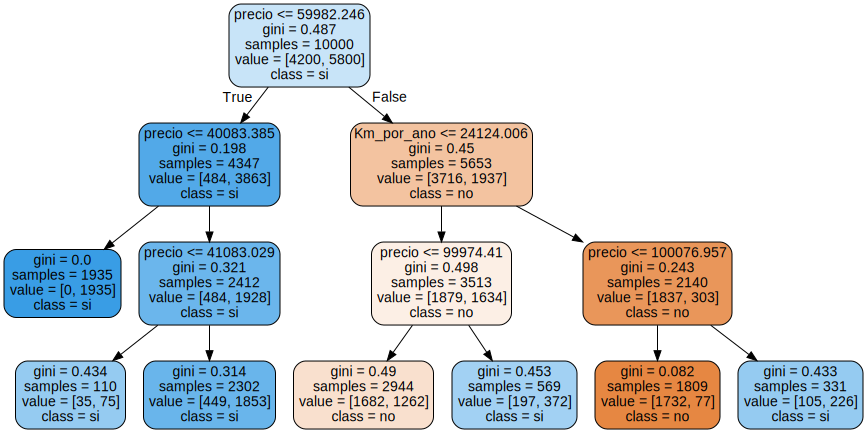

In [46]:
features = x_ord.columns
dot_data = export_graphviz(mejor, out_file=None, filled=True, rounded=True,
                class_names=['no','si'],
                feature_names = features)

graph = graphviz.Source(dot_data)
graph

Entonces sí estamos visualizando el modelo, el árbol de decisión que tiene relación con nuestro mejor modelo. Okay, y aquí están todas las reglas, las clasificaciones y los resultados si el carro será vendido o si no será vendido. Con esto ya podemos tener seguridad de que estamos aplicando la mejor optimización de nuestro modelo y que estamos viendo el mejor resultado para nuestro escenario real.